In [256]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

In [257]:
df_subterraneas = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv',
                                encoding= 'latin1')
df_superficiales = pd.read_csv('Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv',
                                encoding= 'latin1')
escala_subterranea = pd.read_csv('Datos_de_calidad_del_agua_2020/Escalas_subterranea.csv',
                                encoding= 'latin1')
escala_superficial = pd.read_csv('Datos_de_calidad_del_agua_2020/Escalas_superficial.csv',
                                encoding= 'latin1')

## Limpieza por DataFrame
Veremos uno por uno como es que están los dataframes para poder dejar la información limpia para poder tener los datos limpios y clasificados.

### Aguas subterraneas

In [258]:
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domesti

In [259]:
df_subterraneas.describe(include= 'all')

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
count,1068,1068,1068,1068,1068,1068,1068,1068.000000,1068.000000,1068.0,1064.000000,1064,1062.000000,1062,0.0,1066,1066,1066,1068,1068,1067,1067,1068,1068,1067,1067,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,634,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068,1068
unique,1068,1066,13,32,452,273,8,NaN,NaN,NaN,NaN,4,NaN,5,NaN,925,5,4,862,4,889,4,125,5,995,3,209,3,3,2,168,2,61,2,31,2,362,3,615,2,3,126,3,3,3,3,2,3,2,3,2,2,2,2,2,2,2
top,DLAGU6,EL FUERTE,CUENCAS CENTRALES DEL NORTE,DURANGO,LA PAZ,PENINSULA DE YUCATAN,POZO,NaN,NaN,NaN,NaN,Alta,NaN,Permisible para riego,NaN,496,Excelente para riego,Potable - Dulce,<0.2,Baja,<20,Potable - Dura,<1.1,Potable - Excelente,<0.02,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,"FLUO,",SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
freq,1,2,232,121,27,119,1039,NaN,NaN,NaN,NaN,794,NaN,460,NaN,4,491,834,162,434,26,577,737,739,65,788,815,816,1066,1066,854,1053,968,1067,1038,1056,545,982,401,932,434,78,1005,939,995,995,876,841,1007,985,941,1066,1053,1067,1056,982,932
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-101.891007,23.163618,2020.0,235.633759,NaN,1138.953013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.703263,3.887670,0.0,116.874291,NaN,1245.563674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-116.664250,14.561150,2020.0,26.640000,NaN,50.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-105.388865,20.212055,2020.0,164.000000,NaN,501.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-102.174180,22.617190,2020.0,215.527500,NaN,815.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.974716,25.510285,2020.0,292.710000,NaN,1322.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [260]:
df_subterraneas.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [293]:
df_subterraneas['COLI_FEC_NMP/100_mL']

0       <1.1
1       <1.1
2       <1.1
3         10
4       <1.1
        ... 
1055    <1.1
1056    <1.1
1057    <1.1
1058    <1.1
1059    <1.1
Name: COLI_FEC_NMP/100_mL, Length: 1060, dtype: object

In [300]:
df_subterraneas['COLI_FEC_NMP/100_mL'] = df_subterraneas['COLI_FEC_NMP/100_mL'].replace({'<1.1':1.1}).astype('float')

In [301]:
def calidad_coli_fec(coli_fec):
    if coli_fec == '<1.1': return 'Excelente'
    elif (coli_fec > 1.1 or  coli_fec <= 200): return 'Buena Calidad'
    elif (coli_fec > 200 or  coli_fec <= 1000): return 'Aceptable'
    elif (coli_fec > 1000 or  coli_fec <= 10000): return 'Contaminada'
    else: return 'Fuertemente contaminada'

In [303]:
df_subterraneas['y_calidad'] = df_subterraneas['COLI_FEC_NMP/100_mL'].apply(lambda x: calidad_coli_fec(x))


In [278]:
subterraneas_col_id = ['SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
                        'ACUIFERO', 'SUBTIPO', 'PERIODO']

subterraneas_col_calidad = [x for x in df_subterraneas.columns if x[0:7] == 'CALIDAD'] + ['SEMAFORO']

subterraneas_col_medicion = [x for x in df_subterraneas.columns if x[-1] == 'L']

subterraneas_col_cumplimiento = [x for x in df_subterraneas.columns if x[0:7] == 'CUMPLE_']

Porcentaje de nulos por cada columna

In [262]:
pd.DataFrame(df_subterraneas.isna().sum() /len(df_subterraneas)).sort_values(by= 0, ascending= False)

,0
SDT_mg/L,1.000000
CONTAMINANTES,0.406367
CALIDAD_CONDUC,0.005618
CONDUCT_mS/cm,0.005618
ALC_mg/L,0.003745
CALIDAD_ALC,0.003745
CALIDAD_SDT_ra,0.001873
SDT_M_mg/L,0.001873
CALIDAD_SDT_salin,0.001873
CALIDAD_N_NO3,0.000936


Podemos ver que la variable de SDT_mg/L está en su totalidad siendo NaN por lo que la eliminaremos y veremos si es que es suficiente con imputar los valores de las demás variables en nulo ya que tenemos una con hasta 50% de nulos. Veremos que tanto aporta al dataframe y después decidiremos si es que es necesario quedarnosla.

In [263]:
df_subterraneas.drop('SDT_mg/L', axis= 1, inplace=True)

In [264]:
subterraneas_col_medicion = [x for x in subterraneas_col_medicion if x != 'SDT_mg/L']

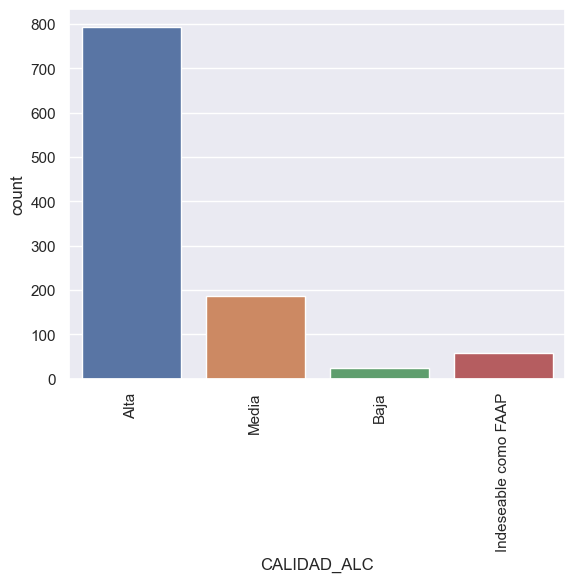

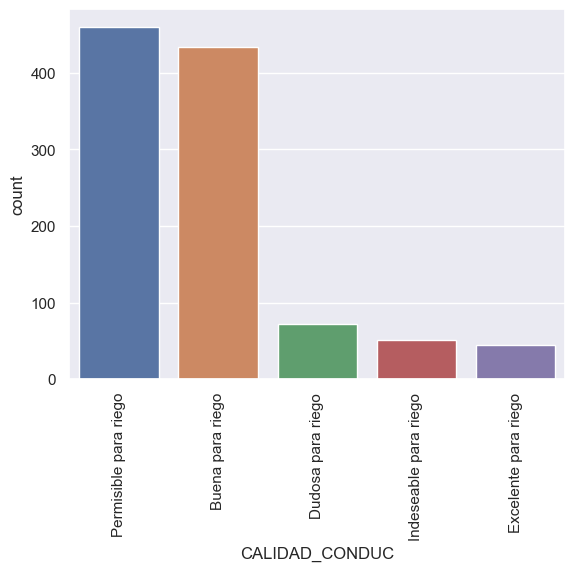

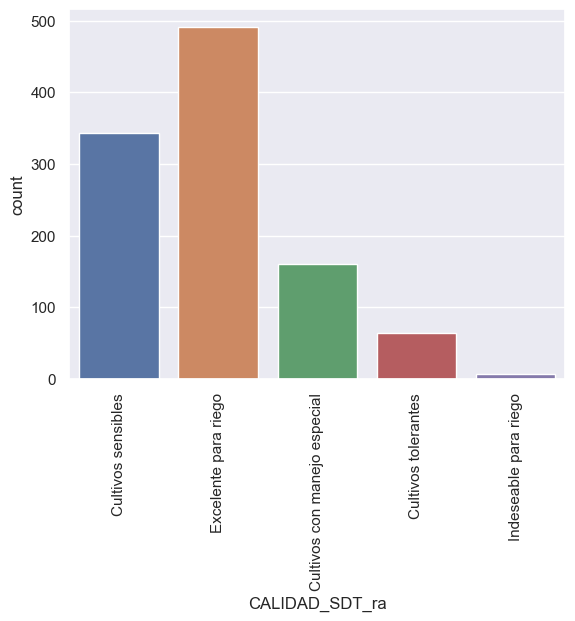

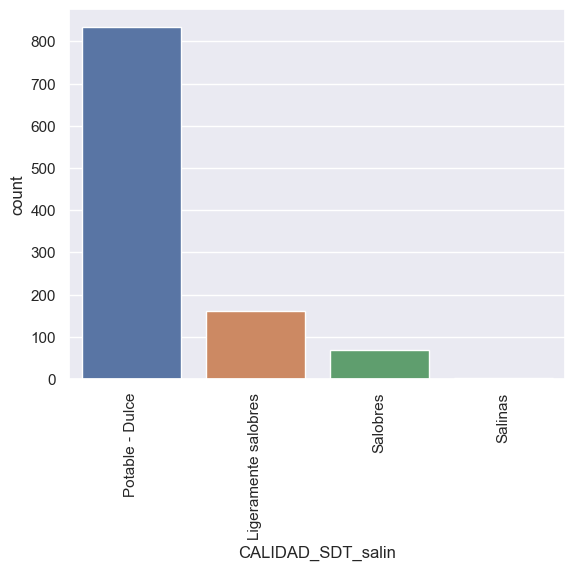

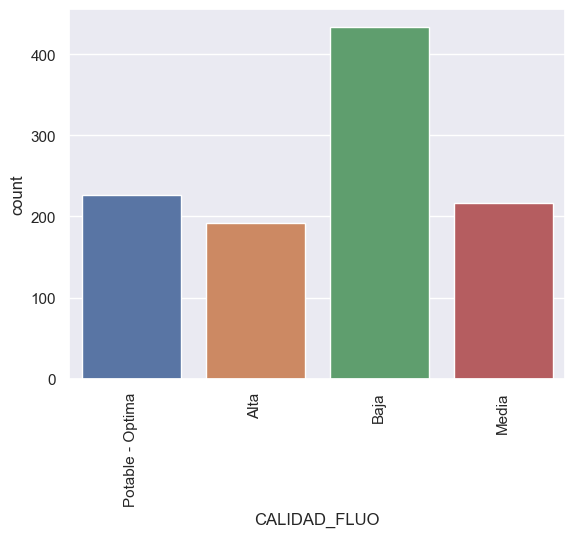

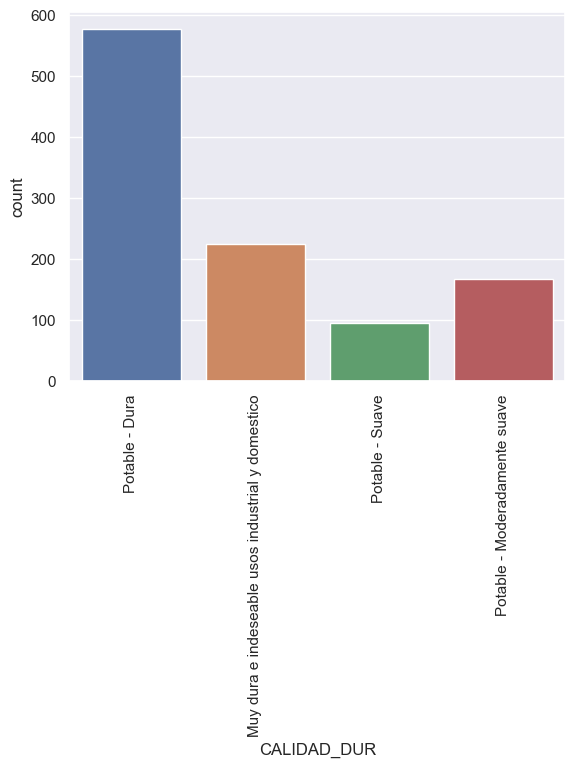

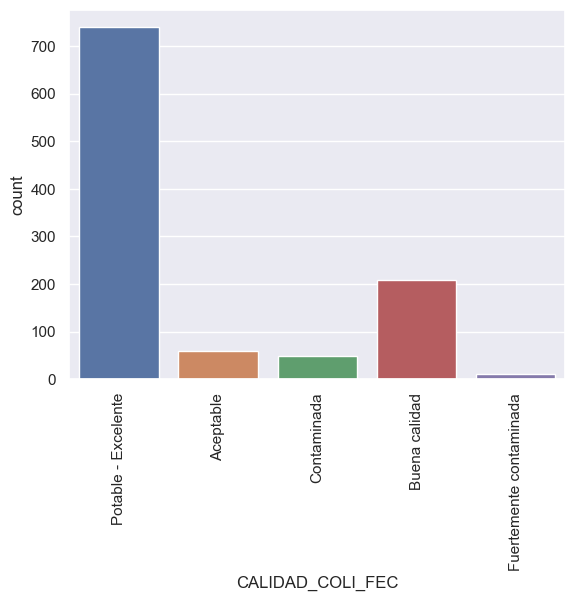

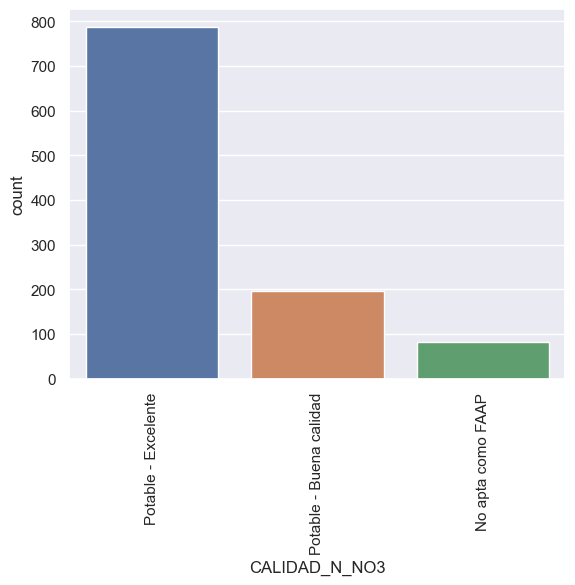

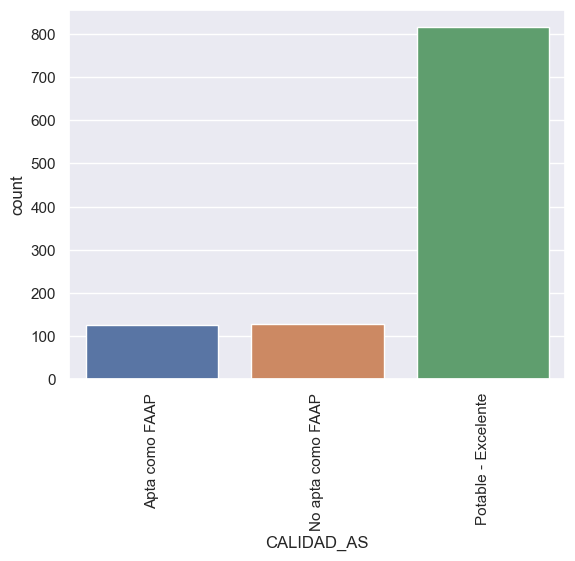

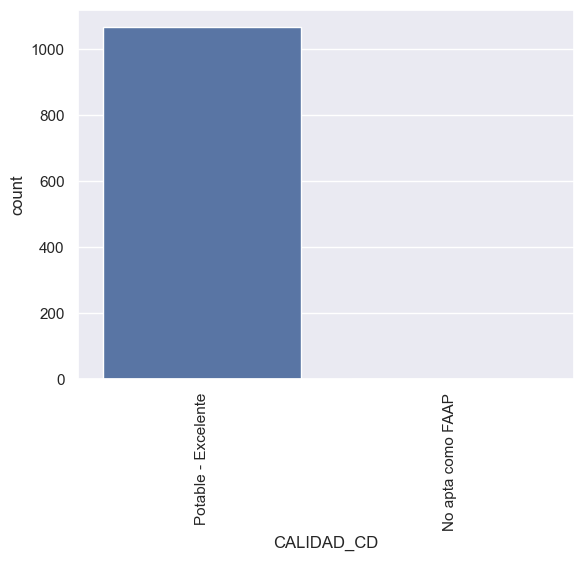

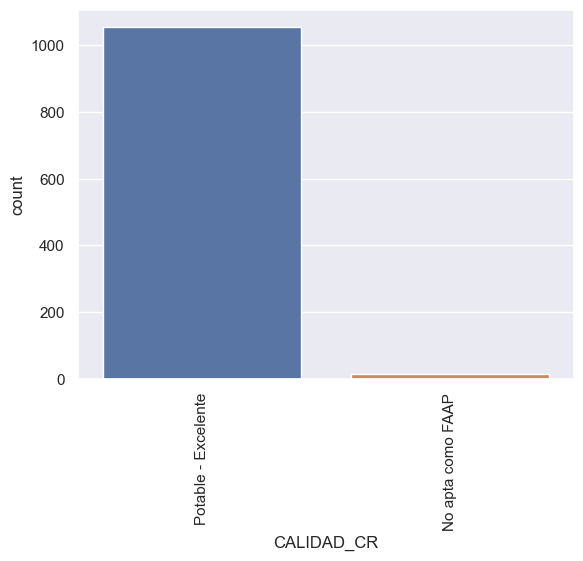

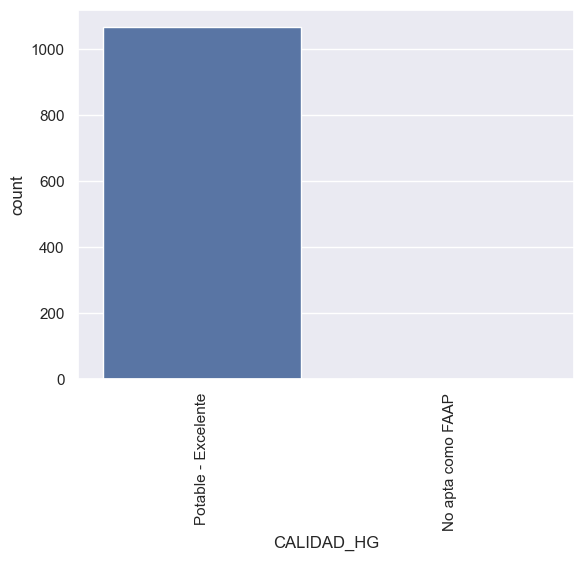

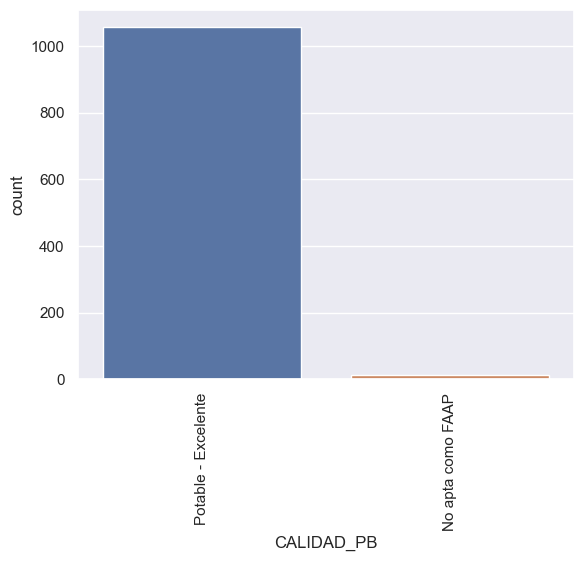

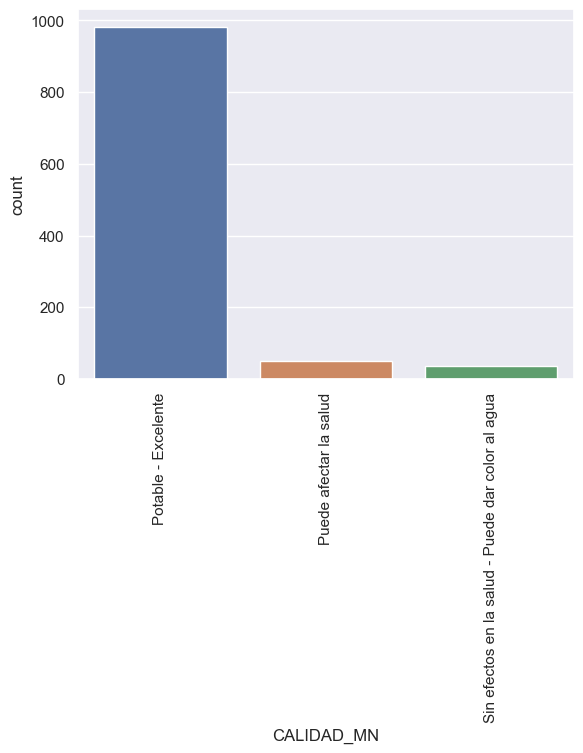

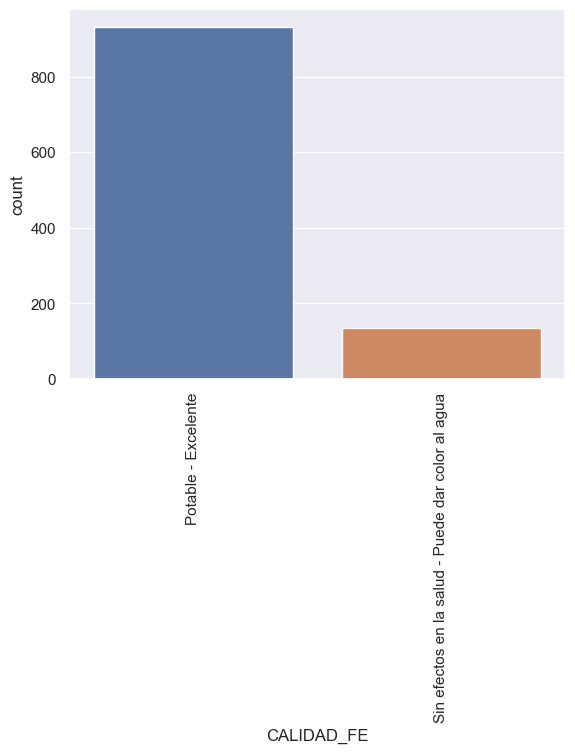

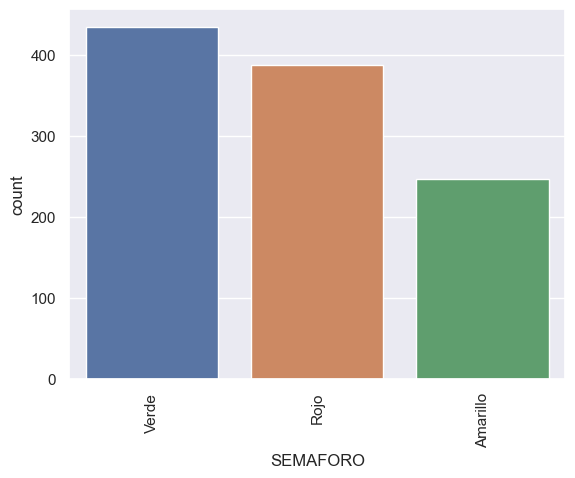

In [265]:
for col in subterraneas_col_calidad:
    sns.countplot(x= df_subterraneas[col])
    # plt.figure(figsize=(10,10))
    plt.xticks(rotation= 90)
    plt.show()

La otra variable que tiene muchos valores en NaN es contaminantes pero como podemos ver es una variable la cual aunque tiene muchos valores distinto tendremos que ver si es que su densidad es mucha para ese valor y tomar la decisión correcta al imputar.

In [266]:
pd.DataFrame(df_subterraneas['CONTAMINANTES'].value_counts(normalize=True))

,CONTAMINANTES
"FLUO,",0.123028
"DT,",0.102524
"FLUO,AS,",0.080442
"CF,",0.048896
"AS,",0.048896
...,...
"ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,",0.001577
"ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,",0.001577
"PB,MN,FE,",0.001577
"ALC,AS,FE,",0.001577


Primero podemos ver con esto que cuando hay más de un contaminante en la observación este es separado por comas por lo que primero tendríamos que limpiar esa columna para seguir con el trabajo de imputación

In [267]:
aux = df_subterraneas['CONTAMINANTES'].str.split(',', expand=True).T.replace({'': 'vacio', np.nan: 'NaN_'})
lista_contaminantes = []
for col in aux.columns:
    lista_contaminantes.append(list(aux[col].unique()))

# print(lista_contaminantes)

In [268]:
dummies_contaminantes = pd.get_dummies(
    pd.Series(lista_contaminantes).apply(pd.Series).stack()).sum(level=0)


C:\Users\alexe\AppData\Local\Temp\ipykernel_26536\3321957741.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies_contaminantes = pd.get_dummies(


In [269]:
dummies_contaminantes.sum()

ALC            59
AS            127
CD              2
CF             61
CONDUC        123
CR             15
DT            226
FE            136
FLUO          192
HG              1
MN             86
NI              2
NO3            82
NaN_         1067
PB             12
SDT_ra         71
SDT_salin      71
vacio         634
dtype: int64

Ya lo podemos ver por categoría pero el problema es que realmente no nos ayuda adivinar cual es el valor dentro de esos mil registros.
Por lo que mejor borraremos la columna y el modelo podrá tomar esos como otra categoría si es que tiene los demás valores como 0 
y ya solo faltaría unirlo con el dataframe original.

In [270]:
dummies_contaminantes.drop('NaN_', axis= 1, inplace= True)
df_subterraneas.drop('CONTAMINANTES', axis=1, inplace= True)

In [271]:
lista_contaminantes = dummies_contaminantes.columns

In [272]:
df_subterraneas = pd.concat([df_subterraneas, dummies_contaminantes], axis= 1)
df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin,vacio
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BR

Seguiremos con la limpieza de las mediciones con valor en unidades de contaminantes

Con esto podemos ver que se tienen varios valores en lo que caen directamente a los que son menores y los demás casi no tienen datos por lo que haré una separación por frecuencias para así poder agrupar tanto la masa más grande así como identificar si es que hay variables unarias.

In [273]:
def normalizar(df,v,umbral):
    aux = df[v].value_counts(normalize=True).to_frame()
    aux[f'n_{v}'] = np.where(aux[v] < umbral , 'Otros', aux.index)

    moda = aux.head(1)[f'n_{v}'].values[0]

    if aux.loc[aux[f'n_{v}'] == 'Otros' ][v].sum() < umbral:
        aux[f'n_{v}'].replace( {'Otros':moda} , inplace=True)

    aux.drop(v, axis=1, inplace=True)
    aux.reset_index(inplace=True)

    return df.merge(aux,left_on=[v], right_on='index', how='inner').drop('index',axis=1)

In [274]:
for col in subterraneas_col_medicion:
    df_subterraneas = normalizar(df_subterraneas, col, 0.05)

df_subterraneas

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE,ALC,AS,CD,CF,CONDUC,CR,DT,FE,FLUO,HG,MN,NI,NO3,PB,SDT_ra,SDT_salin,vacio,n_ALC_mg/L,n_SDT_M_mg/L,n_FLUORUROS_mg/L,n_DUR_mg/L,n_COLI_FEC_NMP/100_mL,n_N_NO3_mg/L,n_AS_TOT_mg/L,n_CD_TOT_mg/L,n_CR_TOT_mg/L,n_HG_TOT_mg/L,n_PB_TOT_mg/L,n_MN_TOT_mg/L,n_FE_TOT_mg/L
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.022100,22.208870,2020,229.990,Alta,940.0,Permisible para riego,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Otros,Otros,Otros,Otros,<1.1,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,Otros
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.200750,21.999580,2020,231.990,Alta,608.0,Buena para riego,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Otros,Otros,Otros,Otros,<1.1,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.288010,22.366850,2020,204.920,Alta,532.0,Buena para riego,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Otros,Otros,Otros,Otros,<1.1,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,OCCCN5268M1,POZO 369 ALBIA,CUENCAS CENTRALES DEL NORTE,COAHUILA DE ZARAGOZA,TORREON,PRINCIPAL-REGION LAGUNERA,POZO,-103.361060,25.670980,2020,135.915,Media,486.0,Buena para riego,251,Excelente para riego,Potable - Dulce,4.0054,Alta,<20,Potable - Suave,10,Buena calidad,0.365728,Potable - Excelente,0.0238,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,Otros,Otros,Otros,Otros,Otros,Otros,Otros,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
4,DLSAN2331,POZO SAN DIEGO,GOLFO NORTE,SAN LUIS POTOSI,RIOVERDE,RIO VERDE,POZO,-100.084960,21.919460,2020,203.670,Alta,501.0,Buena para riego,401.4,Excelente para riego,Potable - Dulce,0.2816,Baja,166.2528,Potable - Dura,<1.1,Potable - Excelente,3.550095,Potable - Excelente,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelent

Ahora eliminamos las columnas unarias ya qu no van a aportar a la modelación por no tener variación y ser solamente un valor.

In [275]:
varn = df_subterraneas.filter(like='n_').columns.tolist()
unarias = [v for v,conteo in zip(varn, [ df_subterraneas[v].unique().shape[0] for v in varn ] ) if conteo == 1]
unarias

['n_ALC_mg/L', 'n_SDT_M_mg/L', 'n_DUR_mg/L', 'n_CD_TOT_mg/L', 'n_PB_TOT_mg/L']

In [276]:
varn = [v for v in varn  if v not in unarias]

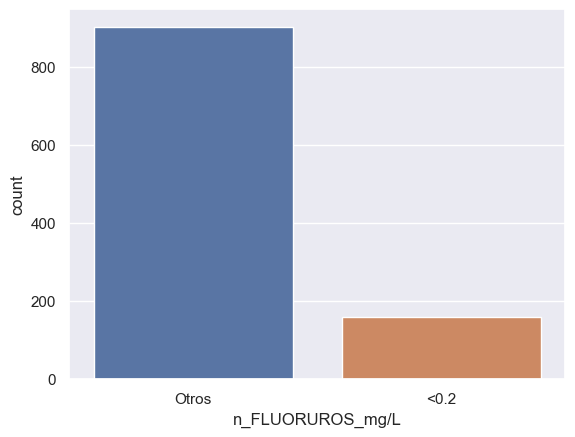

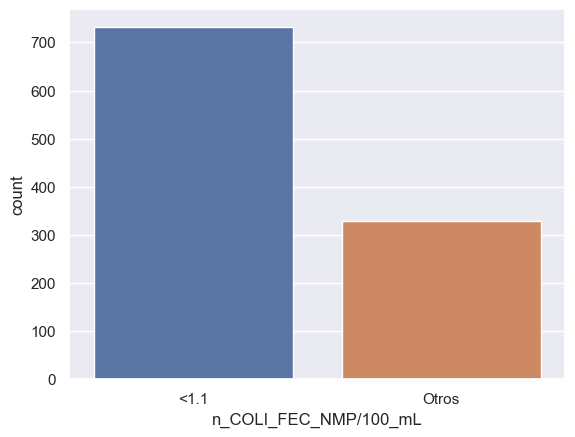

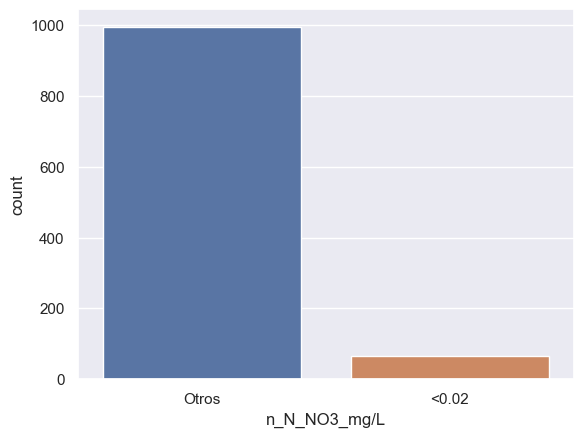

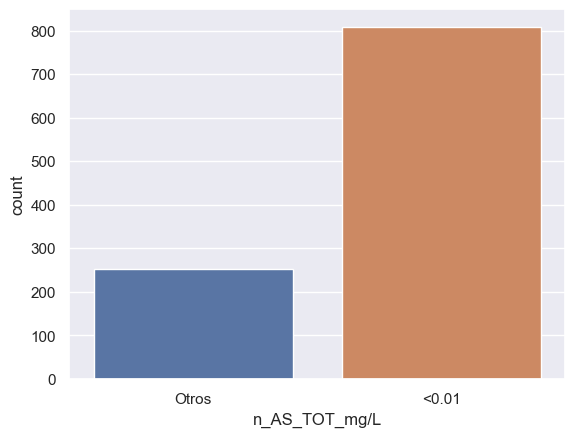

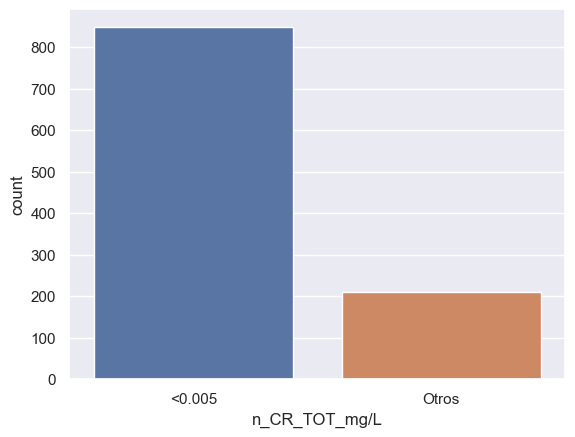

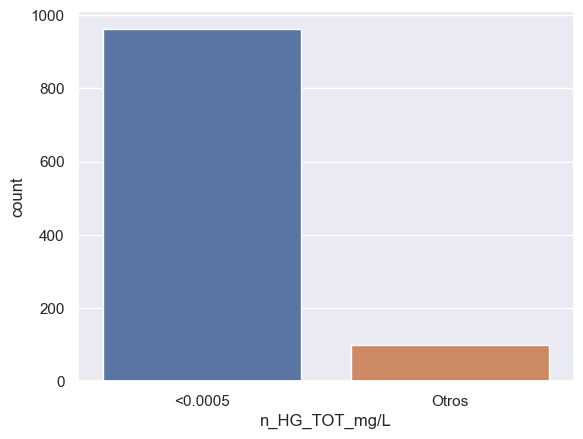

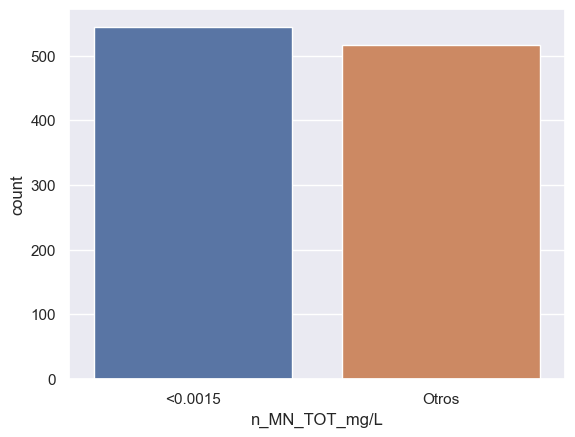

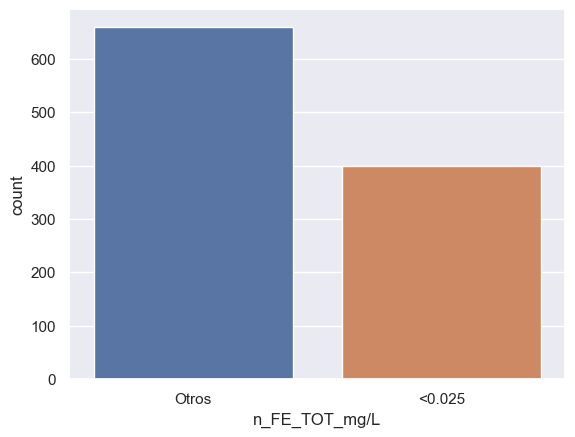

In [277]:
for x in varn:
    sns.countplot(x=df_subterraneas[x])
    plt.show()

Cómo vemos ahora realmente las que parecían ser variables continuas no tienen una densidad mayor que el valor de menor entonces eso como ya veíamos es predomintante para poder marcas las categorías

Ya solo dejaremos los datos listos para ser ingestados en un modelo

In [288]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

um = ['CLAVE', 'LONGITUD', 'LATITUD']
Pipe_categoricas = make_pipeline(OneHotEncoder(drop= 'first'))
cols_pipe_categorica = varn + subterraneas_col_id + subterraneas_col_cumplimiento + subterraneas_col_calidad

In [281]:
escala_subterranea.head()

,CALIDAD DEL AGUA PARA COLIFORMES FECALES_subterraneas,CRITERIO,DESCRIPCION
0,Excelente,COLI_FEC menor a 1.1,Agua potable. Agua no contaminada o condicion ...
1,Buena calidad,COLI_FEC mayor o igual de 1.1 y menor o igual ...,Aguas para uso recreativo con contacto primari...
2,Aceptable,COLI_FEC mayor de 200 y menor o igual a 1000,Aguas con calidad admisible como fuente de aba...
3,Contaminada,COLI_FEC mayor de 1000 y menor o igual a 10000,Aguas con contaminacion bacteriologica. Indic...
4,Fuertemente contaminada,COLI_FEC mayor de 10000,Aguas con fuerte contaminacion bacteriologica....


In [287]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

transformer = make_column_transformer([Pipe_categoricas, cols_pipe_categorica])
# model_pipe = make_pipeline(transformer, KNeighborsClassifier(n_jobs= -1))

grid_knn = GridSearchCV(estimator= KNeighborsClassifier(n_jobs=-1),
                        param_grid= {'n_neighbors': range(0,14)},
                        n_jobs= -1)

grid_knn.fit(transformer.fit_transform(df_subterraneas[cols_pipe_categorica]))


ValueError: 
All the 70 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alexe\OneDrive\Documentos\Entornos virtuales\mna_env\lib\site-packages\sklearn\model_selection\_validation.py", line 684, in _fit_and_score
    estimator.fit(X_train, **fit_params)
TypeError: KNeighborsClassifier.fit() missing 1 required positional argument: 'y'
